# Харьковцов А.В. Теория вероятностей и математическая статистика ДЗ_7

In [1]:
import numpy as np
import scipy.stats
from scipy.stats import t
from scipy.stats import norm

# Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


$Решение:$

$$y = a + bx$$

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

$Итого:$

$y = 444.1774 + 2.6205x$


In [23]:
# Решение:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks
n=len(x)

b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
print (f"коэффициент b = {b:.4f}")
print (f"коэффициент a = {a:.4f}")
y_hat = (a + b*x)
print (y_hat)

r = b * np.std(x) / np.std(y)
R2 = r**2
print (f"R2 = {R2:.4f}")


коэффициент b = 2.6205
коэффициент a = 444.1774
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]
R2 = 0.7876


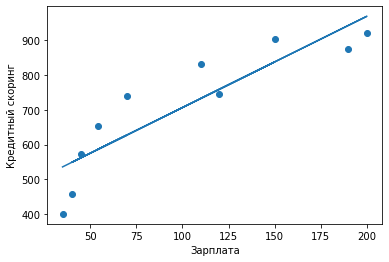

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.show()

    Вообще, если судить по графику, то зависимость не линейная, а, скорее - парабола со степенью корня из Х

# Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

$Решение: $

In [58]:
# Решение:
def mse_(b1,y=y,x=x,n=n):
    return np.sum((b1*x-y)**2)/n

alpha = 1e-8
b1 = 5
b1_=b1
iter = int(input ("введите количество итераций:"))
ttb1 = int(input ("введите точность b1(знаков после запятой):"))
for i in range(iter):
    b1_ -= alpha*(2/n)*np.sum((b1_*x-y)*x)
    if round(b1-b1_,ttb1)==0:
       break
    b1 = b1_
print (f"Итерация:{i},   b1 = {b1:.4f}, средняя квадратичная ошибка  mse = {mse_(b1):.4f}")

введите количество итераций:1000000000
введите точность b1(знаков после запятой):8
Итерация:39193,   b1 = 5.8898, средняя квадратичная ошибка  mse = 56516.8584


# Задача 3

*3. Произвести вычисления как в пункте 2, но с вычислением intercept. 
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$Решение: $
